# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
# Data Managment Libraries
import pandas as pd
import numpy as np

#Basic Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn as sns.set() => use seaborn for its styling 
sns.set()

# Remember that '%matplotlib inline' line is what makes charts appear in your notebook, and not in a new window
%matplotlib inline
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
# pandas.read_csv('file_name.csv_extension')
df = pd.read_csv('data/cars.csv')

# df = data frame instantiated with the cars.csv file
# .head() produces the first 5 rows of our data **0 Index**
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [3]:
import enum
import calendar
import math
import pandas as pd
import numpy as np

import datetime 
from scipy.stats import norm

from math import log, exp, sqrt

from utils import MyYahooFinancials 

data = self.yfinancial.get_historical_price_data(s_date,e_date,time_interval)


ModuleNotFoundError: No module named 'utils'

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [6]:
# 1. Print the number of duplicate rows we have in our dataframe.
# print(df.duplicated().sum())
# .duplicated() -> how many duplicate row entries we have 
# .sum() -> sum of all those duplicate row entries

print('Number of Duplicate Rows: {}'.format(df.duplicated().sum()))
print('Alternatively: {}'.format(df.shape))

Number of Duplicate Rows: 720
Alternatively: (11914, 15)


In [7]:
#  2. Modify our df to have all duplicate rows removed. 
# df = df.dropduplicates() in-place modification to the data frame
# the pandas_user_dataframe.dropduplicates() drops duplicate row entries 

df = df.drop_duplicates()


In [8]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
# Note that after the .drop_duplicates() method we lose all the row entries with duplicate values or non-unique entries
# df.shape[0] -> rows
# df.shape[1] -> columns 

print('Number of Duplicate Rows: {}'.format(df.duplicated().sum()))

Number of Duplicate Rows: 0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [9]:
# * Which column has the most null values and how many null values does it have?
# dataframe.isnull().sum()
# here .isnull() is returning all the entries that have row entries with NULL values
# alternatively df.info() will also return something similiar .isnull()

df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [10]:
# alternatively using df.info() instead to see the pertinent information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11194 non-null  object 
 1   Model              11194 non-null  object 
 2   Year               11194 non-null  int64  
 3   Engine Fuel Type   11191 non-null  object 
 4   Engine HP          11125 non-null  float64
 5   Engine Cylinders   11164 non-null  float64
 6   Transmission Type  11194 non-null  object 
 7   Driven_Wheels      11194 non-null  object 
 8   Number of Doors    11188 non-null  float64
 9   Vehicle Size       11194 non-null  object 
 10  Vehicle Style      11194 non-null  object 
 11  highway MPG        11194 non-null  int64  
 12  city mpg           11194 non-null  int64  
 13  Popularity         11194 non-null  int64  
 14  MSRP               11194 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [11]:
# * Print how long our dataframe is.

print('df.shape (rows,columns) => {} or df.shape[0] => {} or len(df) => {}'.format(df.shape,df.shape[0],len(df)))

df.shape (rows,columns) => (11194, 15) or df.shape[0] => 11194 or len(df) => 11194


In [12]:
# * Remove any row that has a null value in it. 
# pandas_user_dataframe_object = self.dropna()
# .dropna() drops all null values in the data frame 

df = df.dropna()


In [13]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
# As we did in cell [39] run the shape and get the picture of the overall data set 

print('df.shape (rows,columns) => {} or df.shape[0] => {} or len(df) => {}'.format(df.shape,df.shape[0],len(df)))


df.shape (rows,columns) => (11092, 15) or df.shape[0] => 11092 or len(df) => 11092


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:>

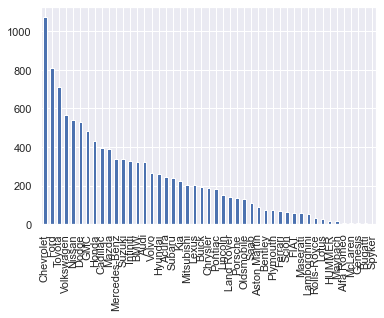

In [14]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

gb = df['Make'].value_counts()
gb.plot(kind='bar')

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

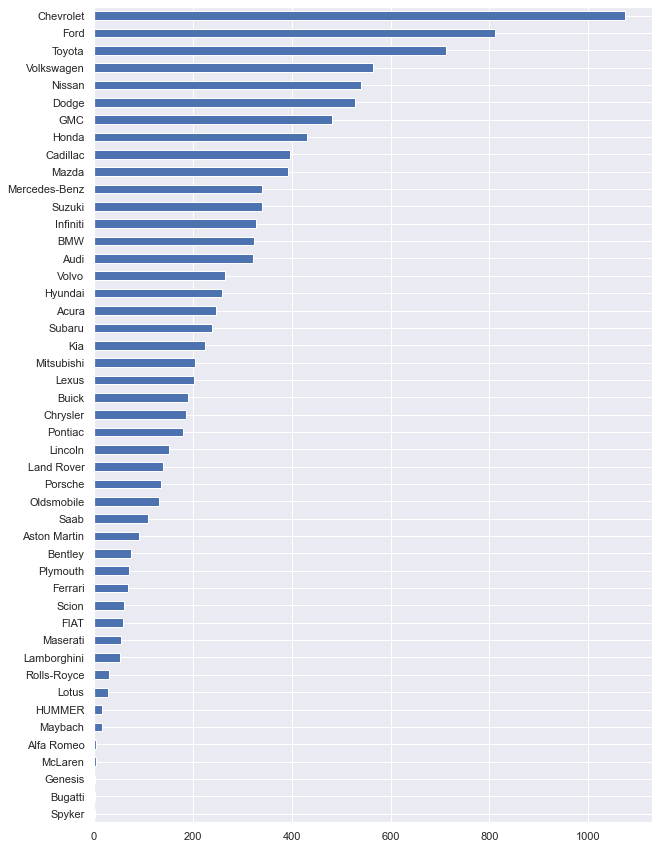

In [18]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

# gb -> groupby_column.sort_values() 
# sort_values() lowest to highest by default
gb_sort = gb.sort_values()

# .plot(kind='barh') barh -> horizontal bar chart
# .plot(default) kind=bar -> regular vertical bar chart
gb_sort.plot(kind='barh', figsize=(10,15));



### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

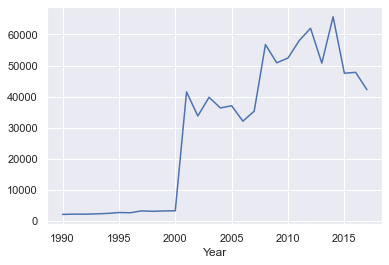

In [20]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

# df.groupby('column_condition')['column_condition'].function()['Specific_Column']

# 1 condition defined
# condition_name = pandas.df.groupby('x-axis')['y-axis'].function_name()
timeline_chart = df.groupby('Year')['MSRP'].mean()

# 2 timeline_chart.plot() 
# .plot(kind='line')
timeline_chart.plot(kind='line')


# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [23]:
# Make a column where is 10 when year is less than 2000, else 1.

# step 1 define the condition needed
cond = df['MSRP']>=2000
df['price_adjustment'] = np.where(cond,10,1)

# Multiply the MSRP by the price adjuster.
# create the new column called 'adjusted_price'

df['adjusted_price'] = df['MSRP']

# here the new adjusted_price is only where = np.where(cond=True,Change when cond reached,No_Change when cond not reached)
df['adjusted_price'] = np.where(cond, df.adjusted_price * df.price_adjustment, df.adjusted_price)


#print out df 
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,price_adjustment,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,10,461350
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,10,406500
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,10,363500
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,10,294500
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,10,345000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,10,461200
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,10,566700
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,10,506200
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,10,509200


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

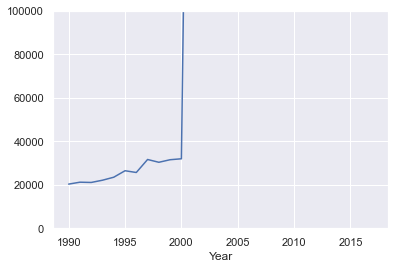

In [24]:
# Plot new prices

# same as before .groupby('x-axis')['y-axis'] 
# change occurs when we input the new y-axis/df that we just created 
df_adjusted_price = df.groupby('Year')['adjusted_price'].mean()

# plot it 
# .plot(kind='type_of_graphical_object', ylim = (start,end) , xlim = (start,end))
df_adjusted_price.plot(kind='line', ylim=(0,100000))


# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [28]:
# What are the top 5 car makers make the most expensive cars on average. 

# set the condition to be based on .groupby('Make')
# using the search criteria ['adjusted_price'] column
top_5_car_makers = df.groupby('Make')['adjusted_price'].mean()

# .sort_values(by,ascending..)
# .sort_values(ascending=True) ascending 0 -> 9
# .sort_values(ascending=False) descending 9 -> 0

top_5_car_makers.sort_values(ascending=False).head()


Make
Bugatti        1.757224e+07
Maybach        5.462219e+06
Rolls-Royce    3.511306e+06
Lamborghini    3.315673e+06
Bentley        2.471693e+06
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [29]:
# Which car makers have the highest median highway MPG?

# median can be found using the same method as .mean() or .mode()
# .median() middle value in our data set
# .groupby('grouping_condition')['criteria_you_are_grouping_on']
median_condition = df.groupby('Make')['highway MPG'].median()

#sort and print to find the highest 
# .sort_values(ascending=False) -> descending order
median_condition.sort_values(ascending=False).head()

Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

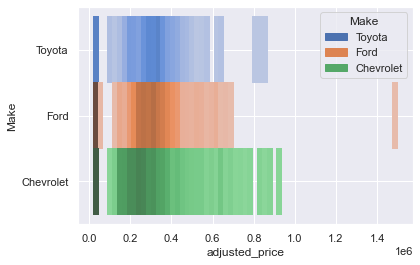

In [34]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

# create the list of the groups
# car_makers = ['grouping']
car_makers = ['Toyota', 'Ford', 'Chevrolet']

# condition = df_name['Overall_Group'].isin('Subset')
car_makers_condition = df['Make'].isin(car_makers)

#create temp_df to store just these values, thus making a data_frame[condition] 
temp_df = df[car_makers_condition] 

hist_car_makers = sns.histplot(data=temp_df, x='adjusted_price', hue='Make', y='Make')

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

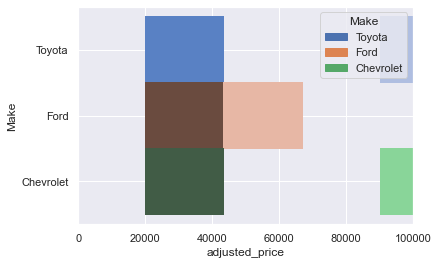

In [36]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

# create the histogram object
# we use the seaborn library
hist_car_makers_2 = sns.histplot(data=temp_df, x='adjusted_price', y='Make', hue='Make')

#histogram_object.set_xlim(left=,right=)
#histogram_object.set_ylim(left=,right=)
hist_car_makers_2.set_xlim(left=0, right = 100000)

# Plot the relationship between Engine HP and highway MPG

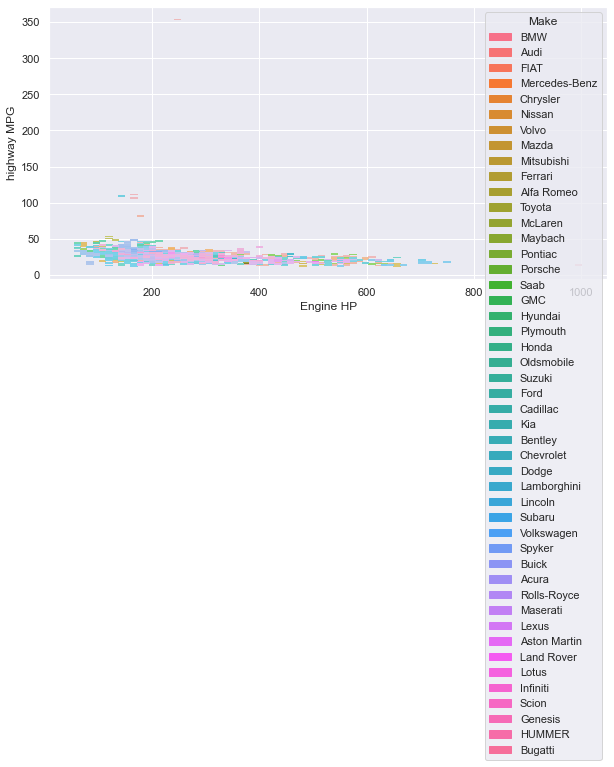

In [42]:
# Plot the relationship between Engine HP and highway MPG
sns.set(rc={"figure.figsize":(10,5)})
relationship = sns.histplot(data=df,hue='Make',y='highway MPG', x='Engine HP')

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

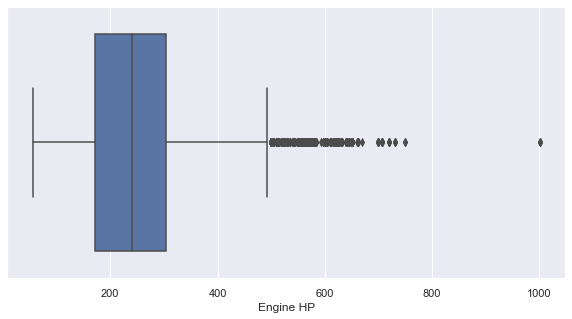

In [43]:
# create a boxplot for the 'Engine HP'

# boxplot_name = seaborn.as_name.boxplot(data=data_frame_inserted, x-axis='column_name')
engine_hp_boxplot = sns.boxplot(data=df,x='Engine HP')


# Make another boxplot for highway MPG

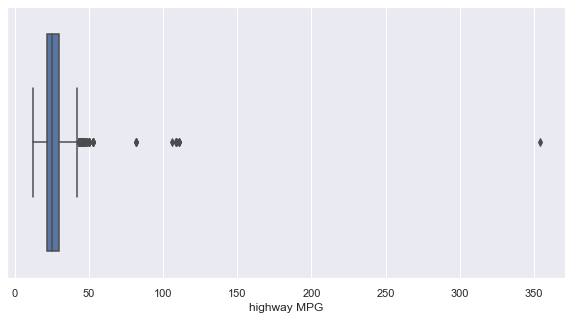

In [44]:
# create a boxplot for the 'highway MPG'
# boxplot_name = seaborn.as_name.boxplot(data=data_frame_inserted, x-axis='column_name')
highway_hp_boxplot = sns.boxplot(data=df,x='highway MPG')

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [59]:
# Remove any  outliers from Engine HP and highway MPG 

# Q1,Q3 and IQR(Q3-Q1) CALC
q1 = df['Engine HP'].quantile(.25)
q3 = df['Engine HP'].quantile(.75)
iqr = q3-q1

#remove outliers below, and above the Q1 and Q3
below_outliers_hp = df['Engine HP'] < (q1 - 1.5 * iqr)
above_outliers_hp = df['Engine HP'] > (q3 + 1.5 * iqr)

df_engine_hp = df[ ~(above_outliers_hp | below_outliers_hp)]

# DO THE SAME FOR highway_MPG

# Remove any  outliers from Engine HP and highway MPG 

# Q1,Q3 and IQR(Q3-Q1) CALC
q11 = df['highway MPG'].quantile(.25)
q33 = df['highway MPG'].quantile(.75)
iqr2 = q33-q11

#remove outliers below, and above the Q1 and Q3
below_outliers_mpg = df['highway MPG'] < (q11 - 1.5 * iqr2)
above_outliers_mpg = df['highway MPG'] > (q33 + 1.5 * iqr2)

df_highway_mpg = df[ ~(above_outliers_mpg | below_outliers_mpg)]

# Remake the boxplots for both Engine HP and highway MPG


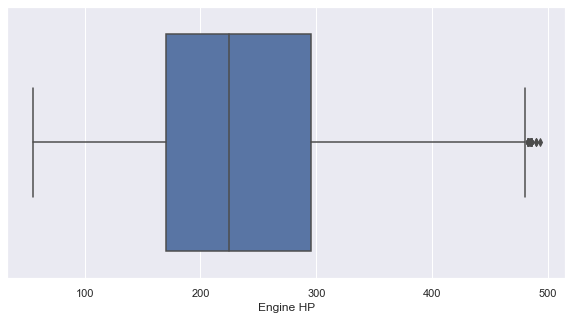

In [60]:
# Engine HP boxplot

# boxplot_name = seaborn.as_name.boxplot(data=data_frame_inserted, x-axis='column_name')
new_engine_hp_boxplot = sns.boxplot(data=df_engine_hp,x='Engine HP')


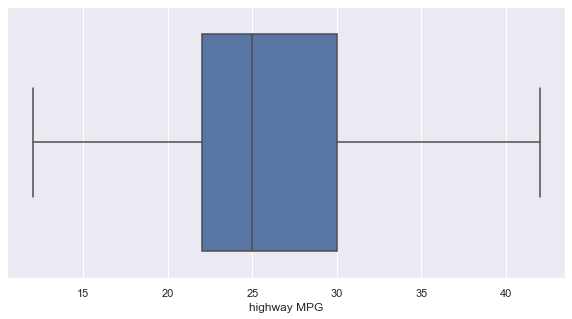

In [61]:
# highway MPG boxplot

# boxplot_name = seaborn.as_name.boxplot(data=data_frame_inserted, x-axis='column_name')
new_highway_hp_boxplot = sns.boxplot(data=df_highway_mpg,x='highway MPG');


# Make a scatter plot of Engine HP vs highway MPG

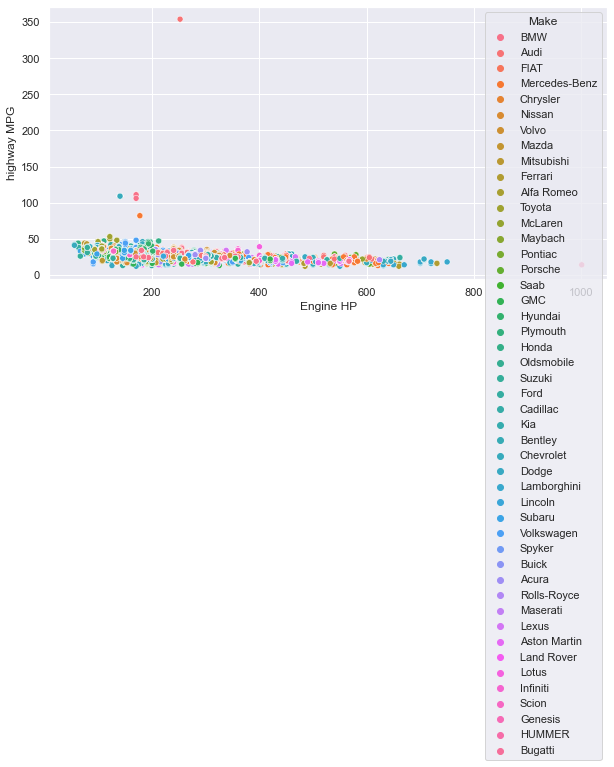

In [62]:
# Make a scatter plot of Engine HP vs highway MPG

sp_hp_vs_mpg = sns.scatterplot(data=df,x='Engine HP', hue='Make', y='highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [64]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Due to the high concentration of highway MPG being localized around the 0-50MPG mark regardless of Engine HP. One could infer that Engine HP does not have a strong correlation with highway MPG')

Due to the high concentration of highway MPG being localized around the 0-50MPG mark regardless of Engine HP. One could infer that Engine HP does not have a strong correlation with highway MPG


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

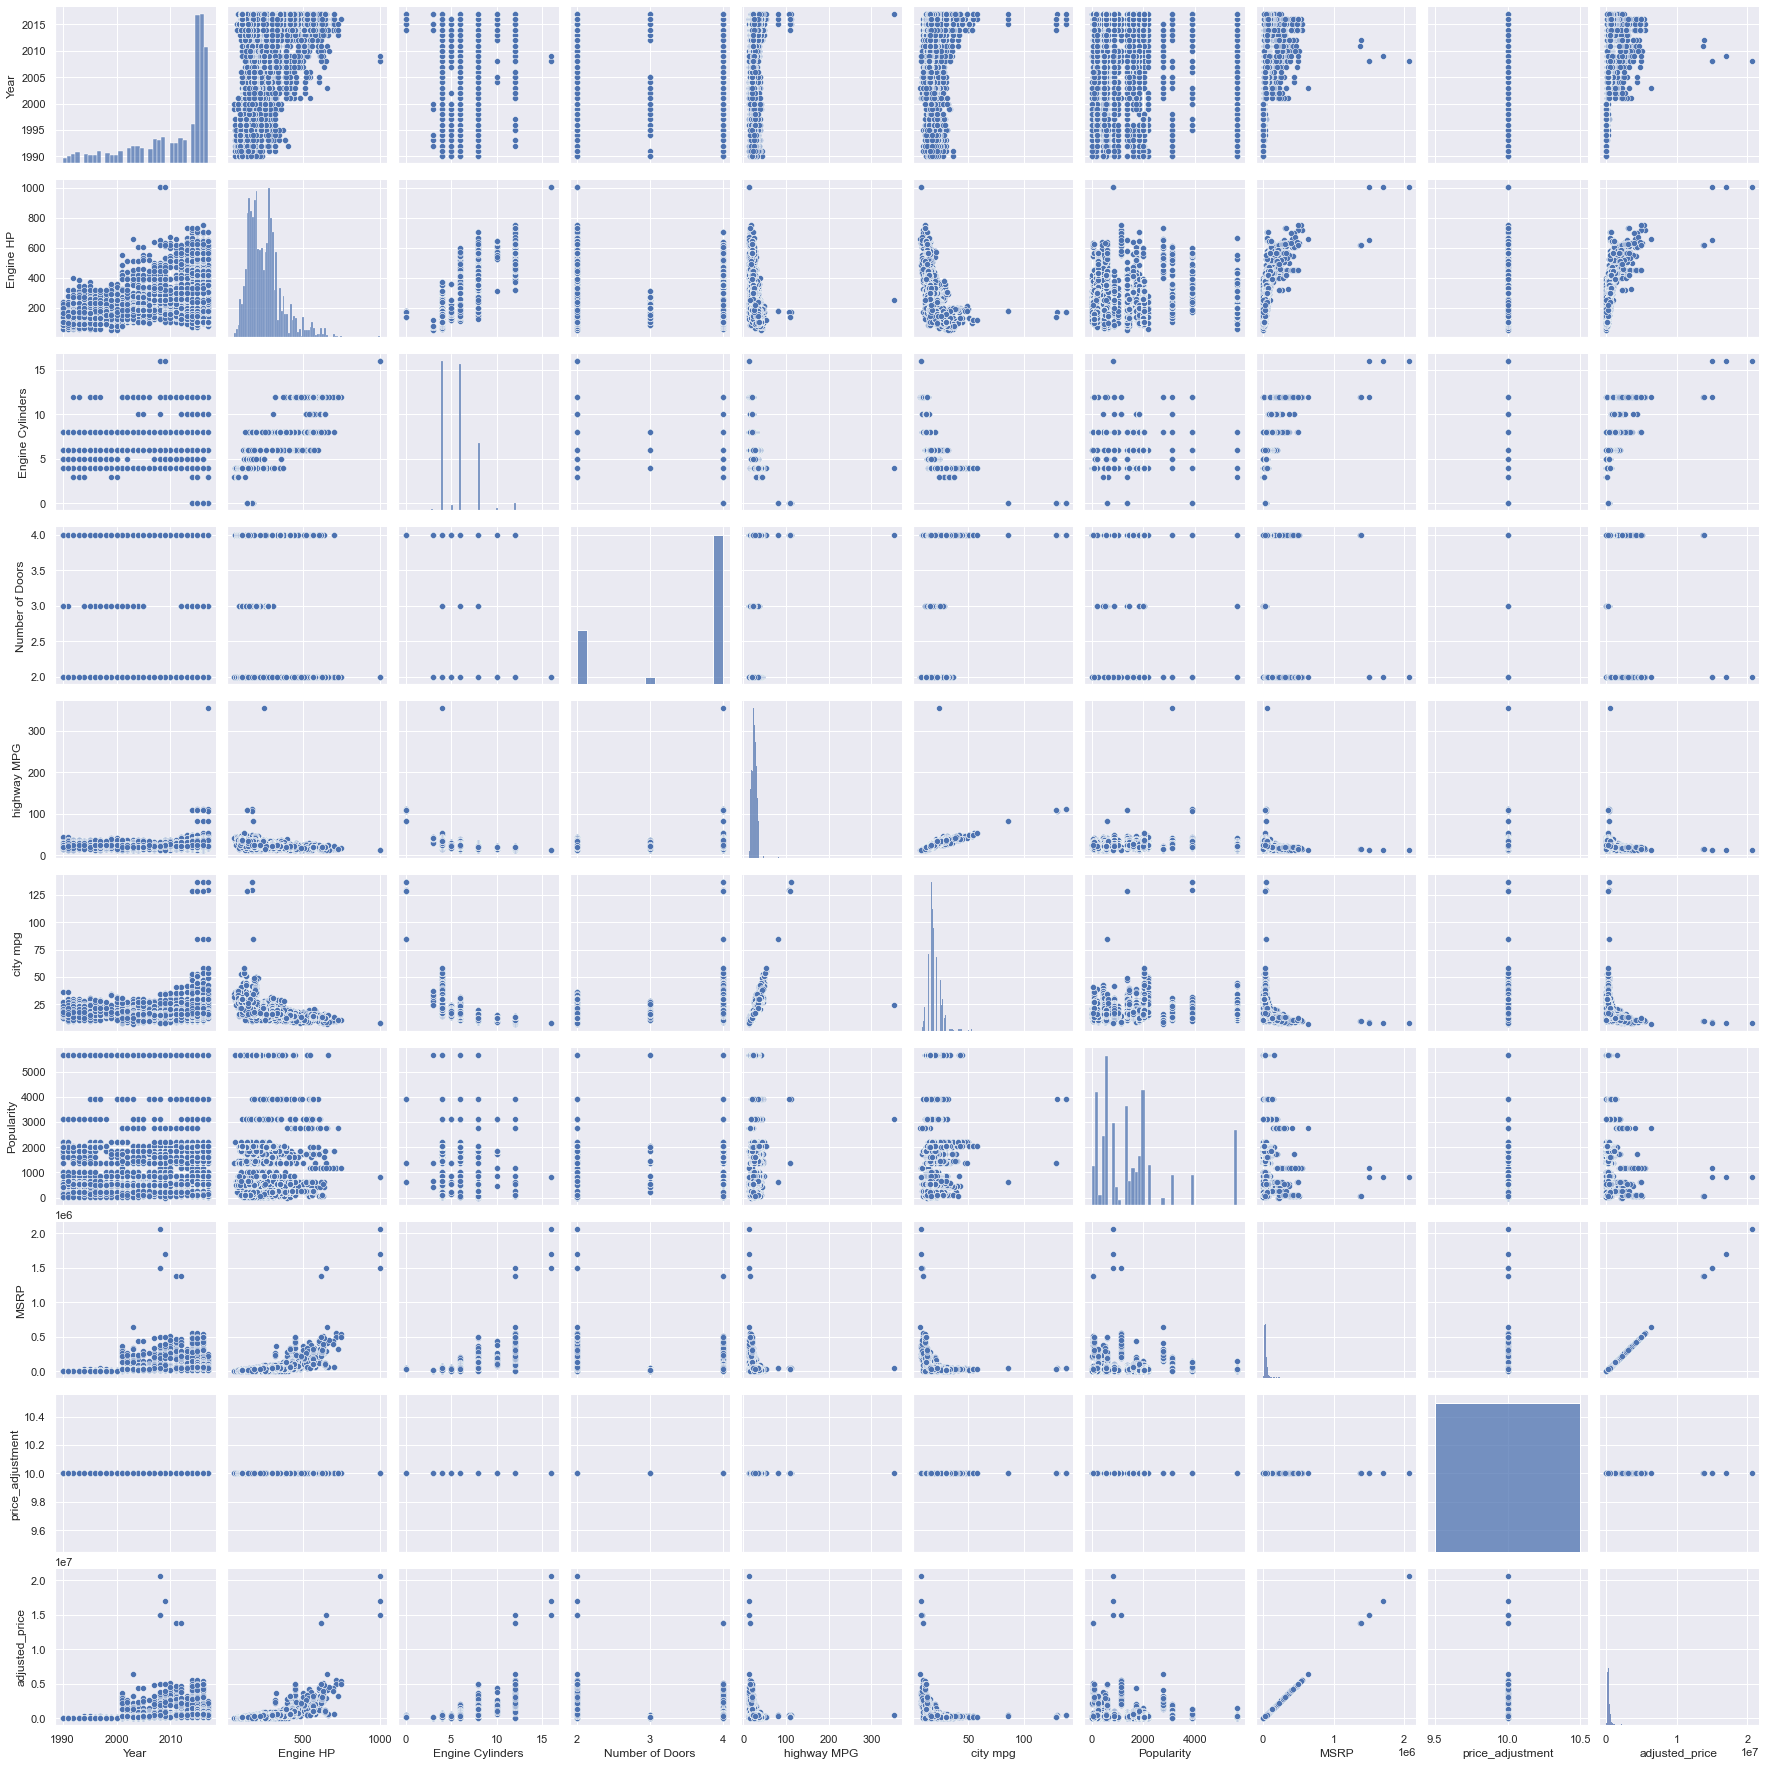

In [66]:
# Using a pairplot, display all of the linear relationship.
pairplots = sns.pairplot(df);
pairplots

In [67]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print('Strong Linear Relationships: ENGINE HP and our adjusted_price as depicted from above')

Strong Linear Relationships: ENGINE HP and our adjusted_price as depicted from above


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

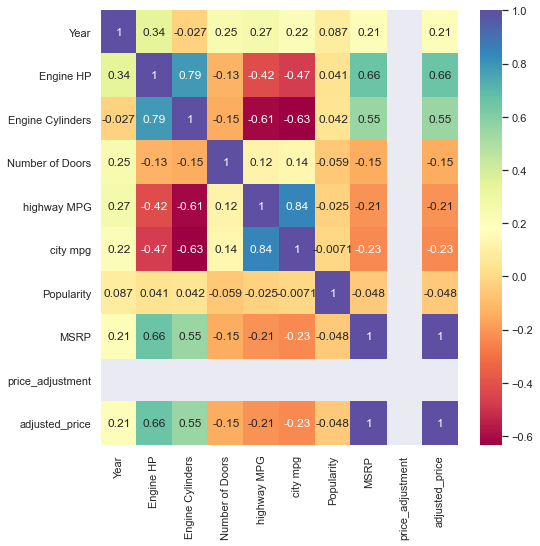

In [73]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

# name of heatmap = sns.set(fig_size_criteria={"figure.figsize"(x by x)})
heatmap_plot = sns.set(rc={"figure.figsize":(8, 8)})
# use sns.heatmap(to set up the criteria for the heatmap)
# (what we are using as the relationship, annotation=True(#'s shown), cmap='representation'
heatmap_plot = sns.heatmap(df.corr(), annot=True, cmap='Spectral')

In [72]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Disregarding the relationships along the diagnol which will obviously have a high correlation. Engine HP has a very strong correlation of .79 to Engine HP. This intuitively makes sense as one could assume that the horsepower of an engine is heavily influenced by the size of the engine. As the amount of cylinders in said vehicle increases, the likelihood the horsepower is to increase is around 80%')

Disregarding the relationships along the diagnol which will obviously have a high correlation. Engine HP has a very strong correlation of .79 to Engine HP. This intuitively makes sense as one could assume that the horsepower of an engine is heavily influenced by the size of the engine. As the amount of cylinders in said vehicle increases, the likelihood the horsepower is to increase is around 80%


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [35]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

